In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense ,Dropout
from keras.optimizers import Adam
import time

# remplacer les valeurs manquantes par **le moyenne de chaque state**

In [15]:
# Load the dataset
df=pd.read_csv('Water_dataX_mean_state_hong_kong.csv')
cols_to_drop=["WQI clf",'ZONE','River','Station','Dates','WQI']
# Diviser les données en caractéristiques et cibles
# Split the dataset into input (X) and output (y) variables
X =  df.drop(cols_to_drop, axis=1)
y = df["WQI"].values

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Reshape the input features for use with CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [21]:
# Build the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [22]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_percentage_error',metrics=['mae','mse'])

In [23]:
import time

# Début du chrono
start_time_mean_state = time.time()
# Enregistrer les temps de départ
step_times = []

# Définir un callback pour mesurer les temps de chaque étape
class TimingCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        step_time = time.time() - self.start_time
        step_times.append(step_time)
# Train the model
history_mean_state=model.fit(X_train, y_train, epochs=3000, batch_size=150, validation_data=(X_test, y_test),callbacks=[TimingCallback()])
# Fin du chrono
end_time_mean_state = time.time()

Streaming output truncated to the last 5000 lines.
157/157 [==============================] - 2s 11ms/step - loss: 2.3238 - mae: 22.8795 - mse: 16056.7539 - val_loss: 2.7740 - val_mae: 24.4609 - val_mse: 12420.1992
Epoch 502/3000
157/157 [==============================] - 2s 13ms/step - loss: 2.9273 - mae: 24.1588 - mse: 13250.6758 - val_loss: 3.2247 - val_mae: 27.6362 - val_mse: 23289.3574
Epoch 503/3000
157/157 [==============================] - 2s 13ms/step - loss: 2.9598 - mae: 24.3624 - mse: 16801.3887 - val_loss: 3.7888 - val_mae: 26.5824 - val_mse: 17251.7031
Epoch 504/3000
157/157 [==============================] - 2s 13ms/step - loss: 2.8253 - mae: 24.0455 - mse: 12971.4033 - val_loss: 3.4851 - val_mae: 34.9755 - val_mse: 19553.4199
Epoch 505/3000
157/157 [==============================] - 2s 10ms/step - loss: 2.6277 - mae: 23.6529 - mse: 13097.6543 - val_loss: 3.5254 - val_mae: 26.6399 - val_mse: 17462.4297
Epoch 506/3000
157/157 [==============================] - 2s 10ms/ste

In [24]:
# Calcul de la durée d'entraînement en secondes
training_time_mean_state = end_time_mean_state - start_time_mean_state
# Affichage de la durée d'entraînement
print("Le temps d'entraînement est de", training_time_mean_state, "secondes")
# Evaluate the model
loss_mean_state = model.evaluate(X_test, y_test)
print('Mean absolute percentege error:', loss_mean_state[0])
print('Mean absolute error:', loss_mean_state[1])
print('Mean squared error:', loss_mean_state[2])

Le temps d'entraînement est de 6083.732702970505 secondes
184/184 [==============================] - 1s 3ms/step - loss: 1.7586 - mae: 17.1752 - mse: 3724.6111
Mean absolute percentege error: 1.758611798286438
Mean absolute error: 17.175203323364258
Mean squared error: 3724.611083984375


In [ ]:
# Predict the WQI for a new sample
new_sample = np.array([[7.5, 8.0, 300, 2.0, 0.5, 100, 2005]])
new_sample = scaler.transform(new_sample)
new_sample = new_sample.reshape((new_sample.shape[0], new_sample.shape[1], 1))
prediction = model.predict(new_sample)
print('Predicted WQI:', prediction[0][0])

1/1 [==============================] - 0s 367ms/step
Predicted WQI: 72.0525


In [25]:
model.save('prediction_wqi_par_cnn_mean_state_3000_epochs_batch_150.h5')

*comparaison*

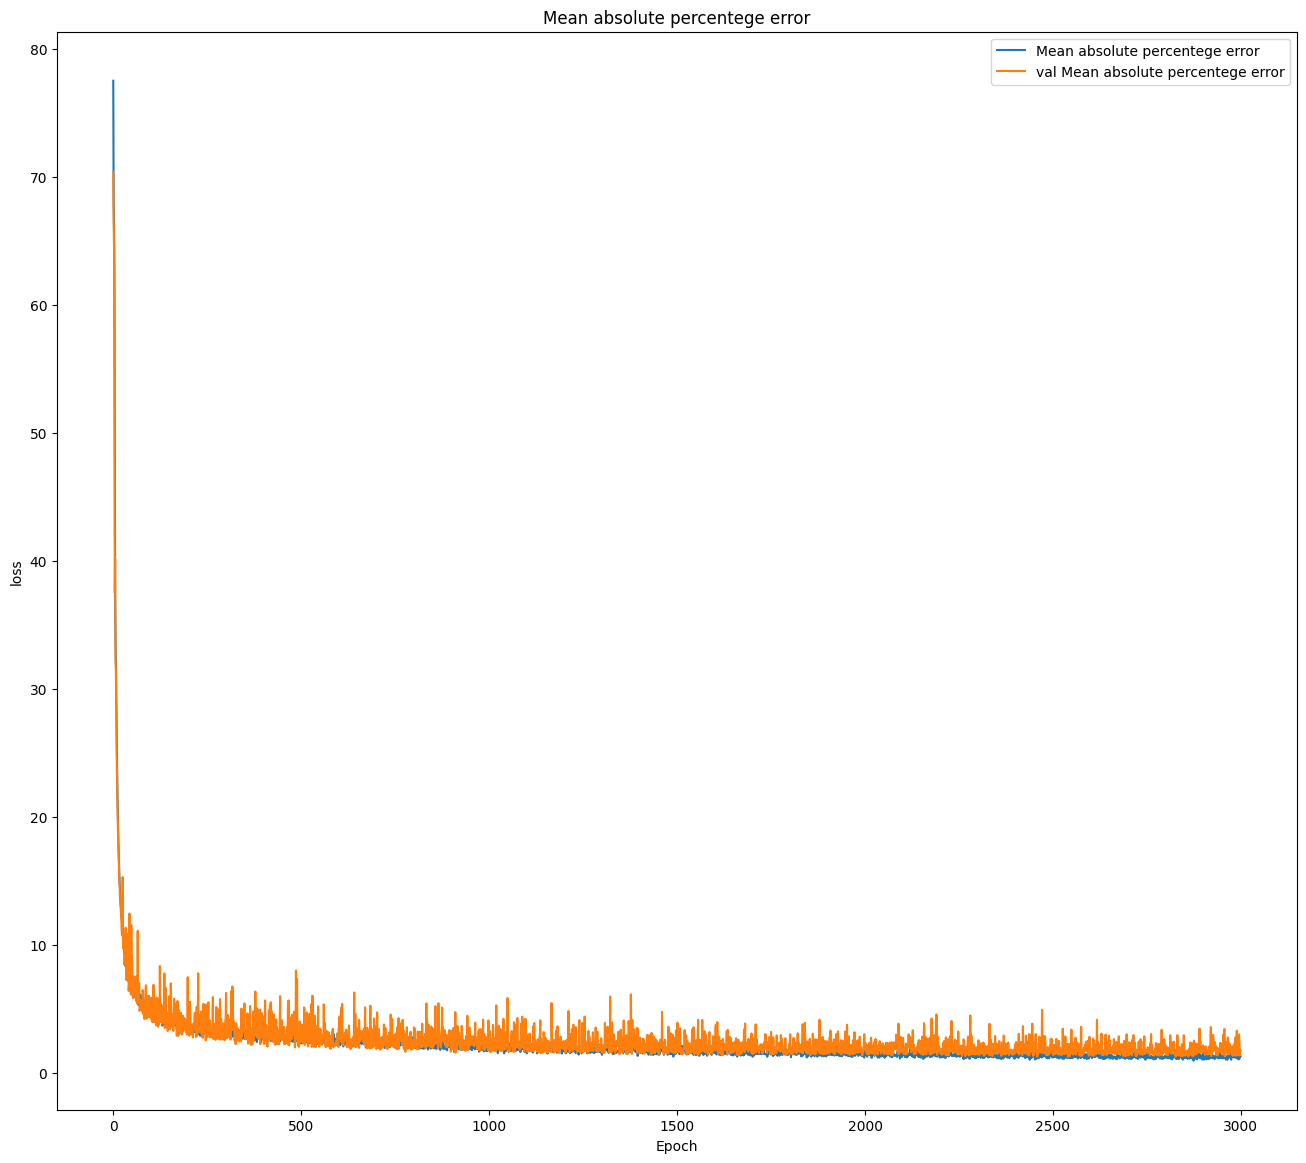

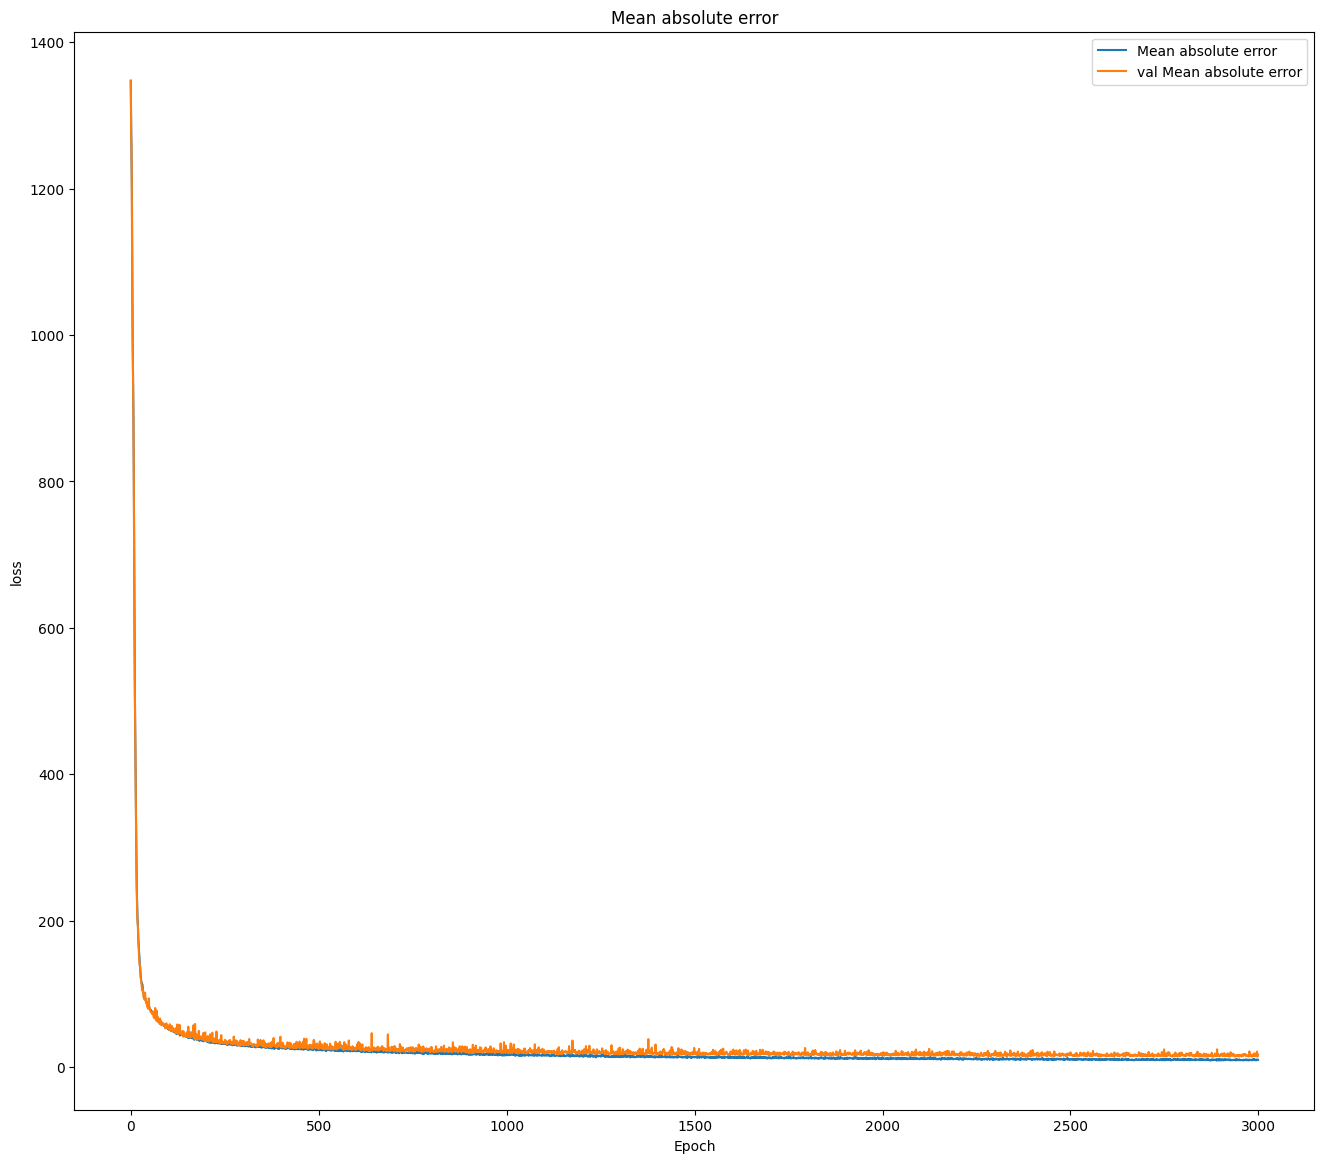

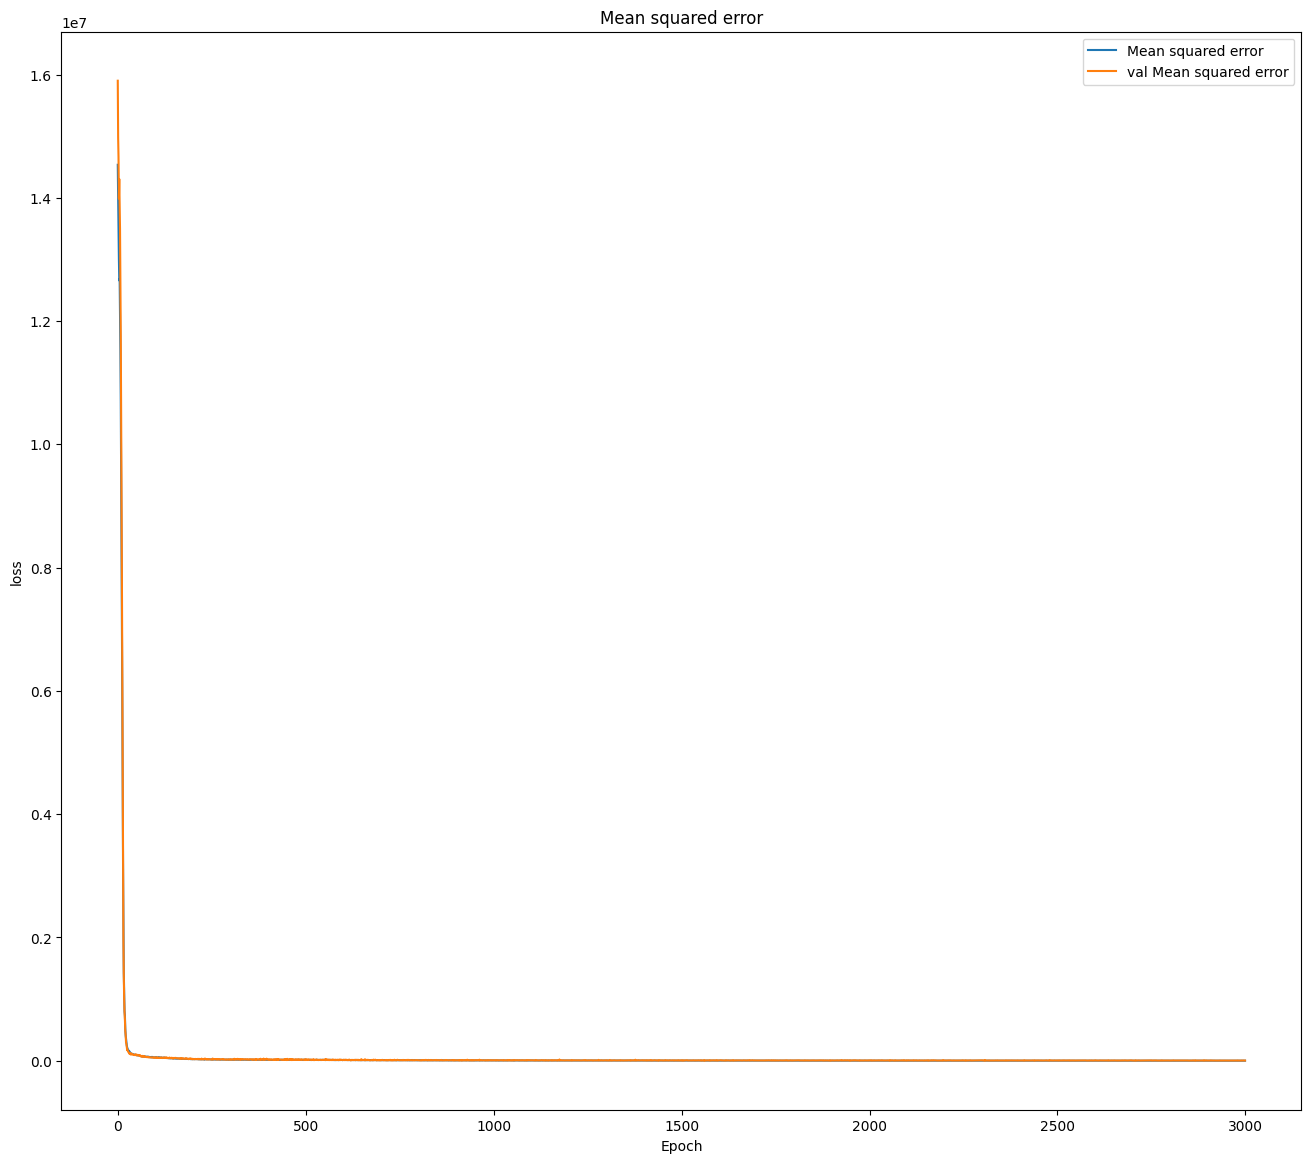

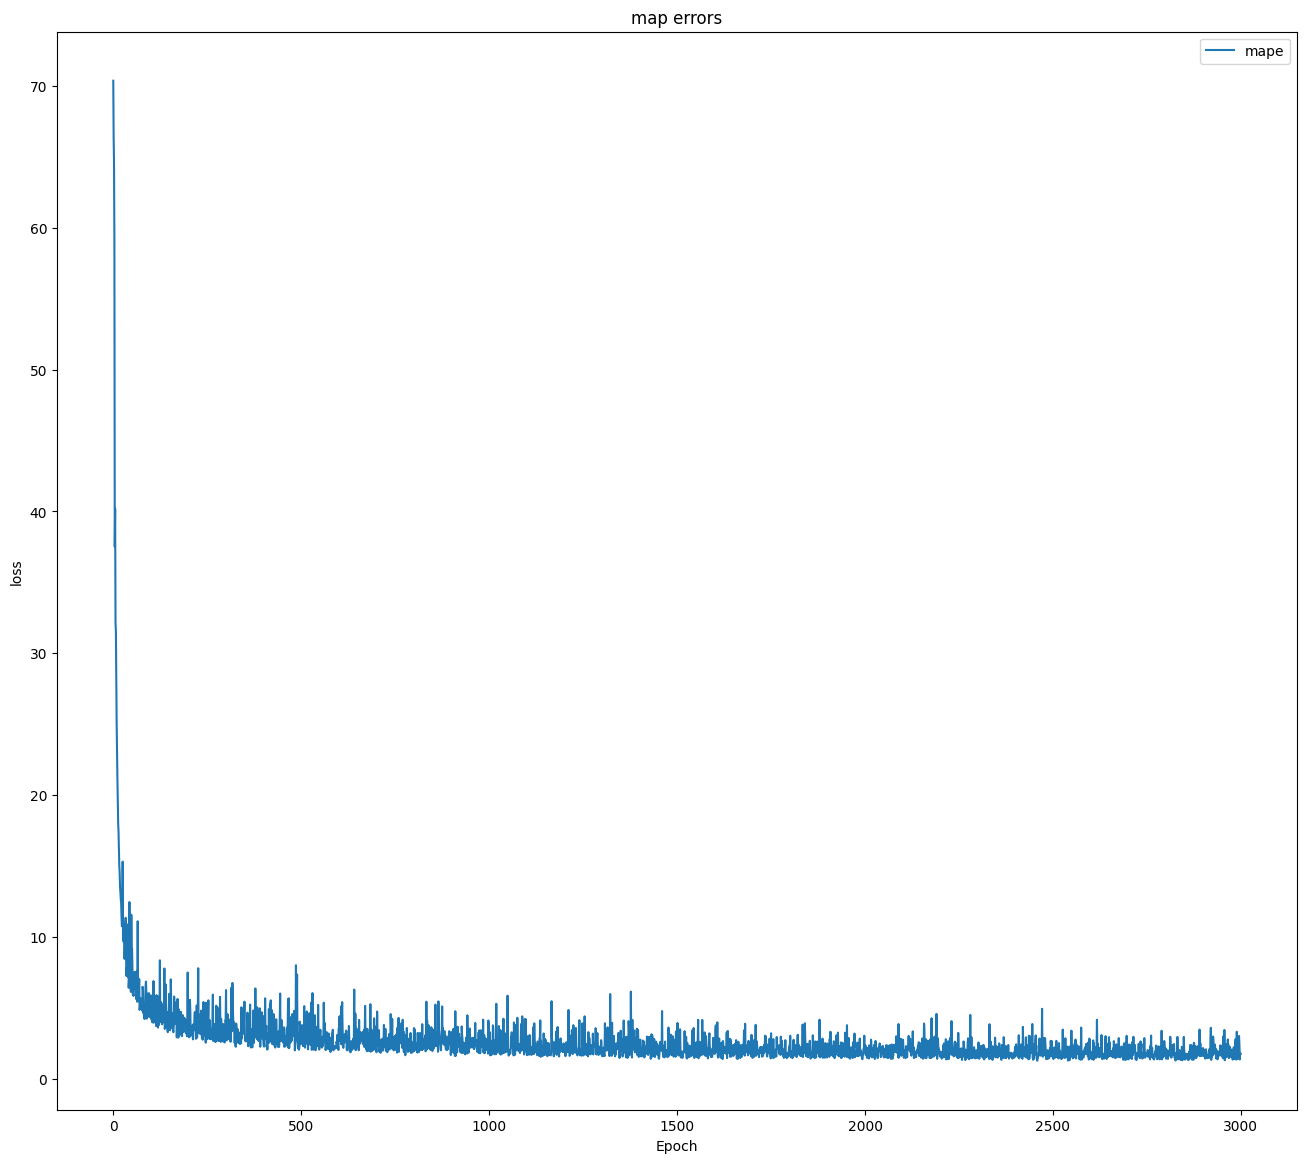

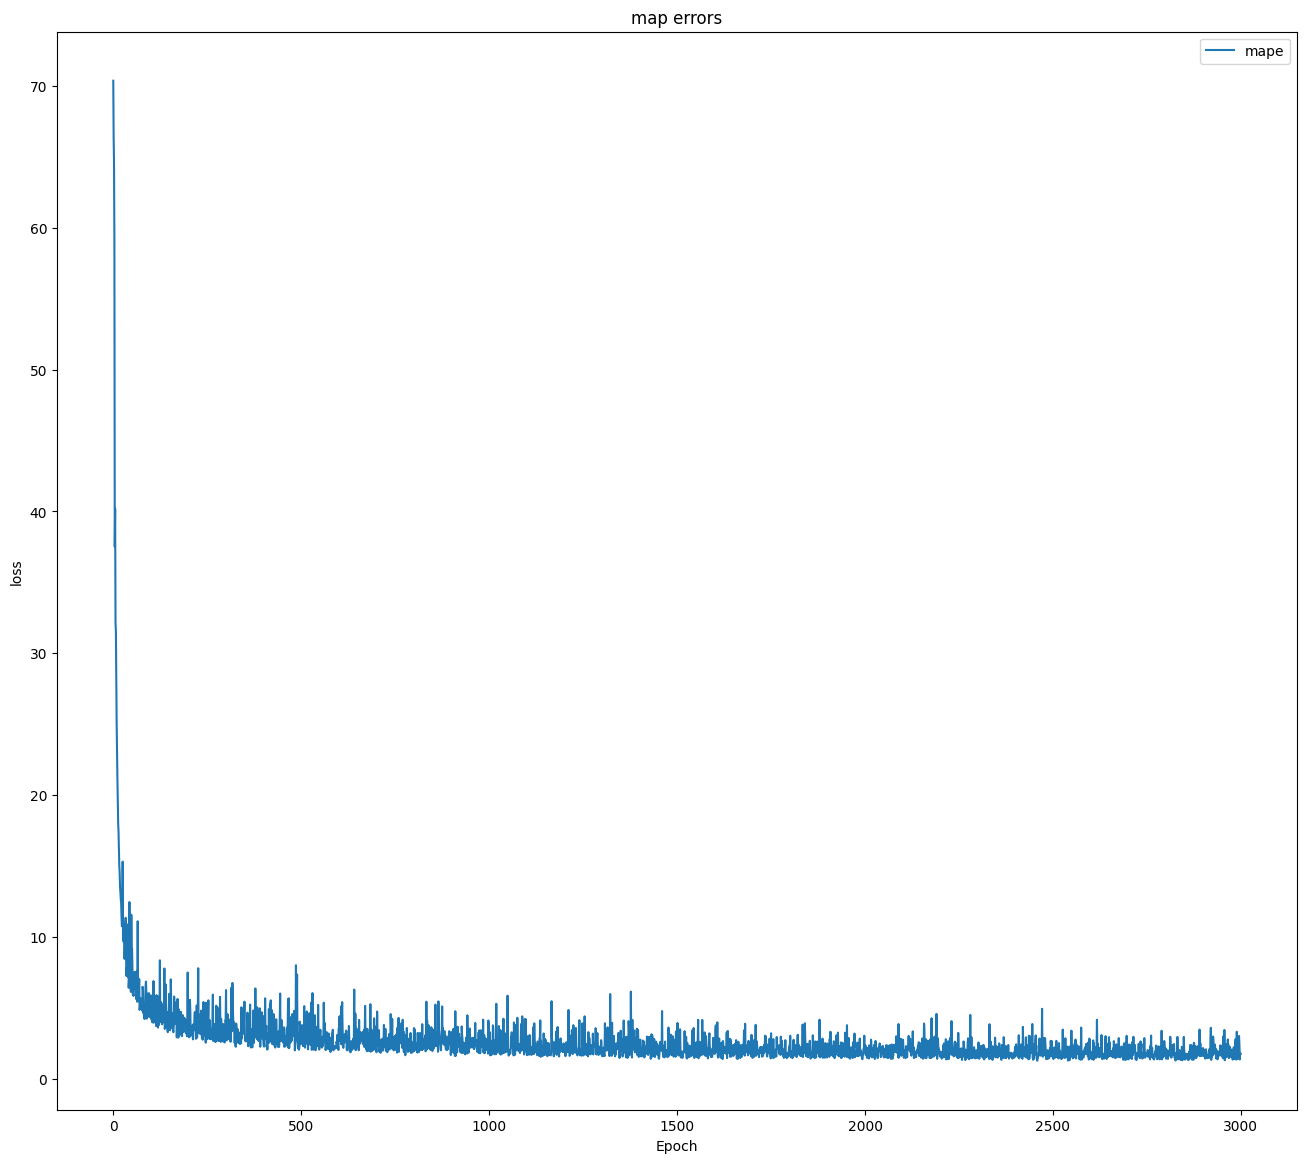

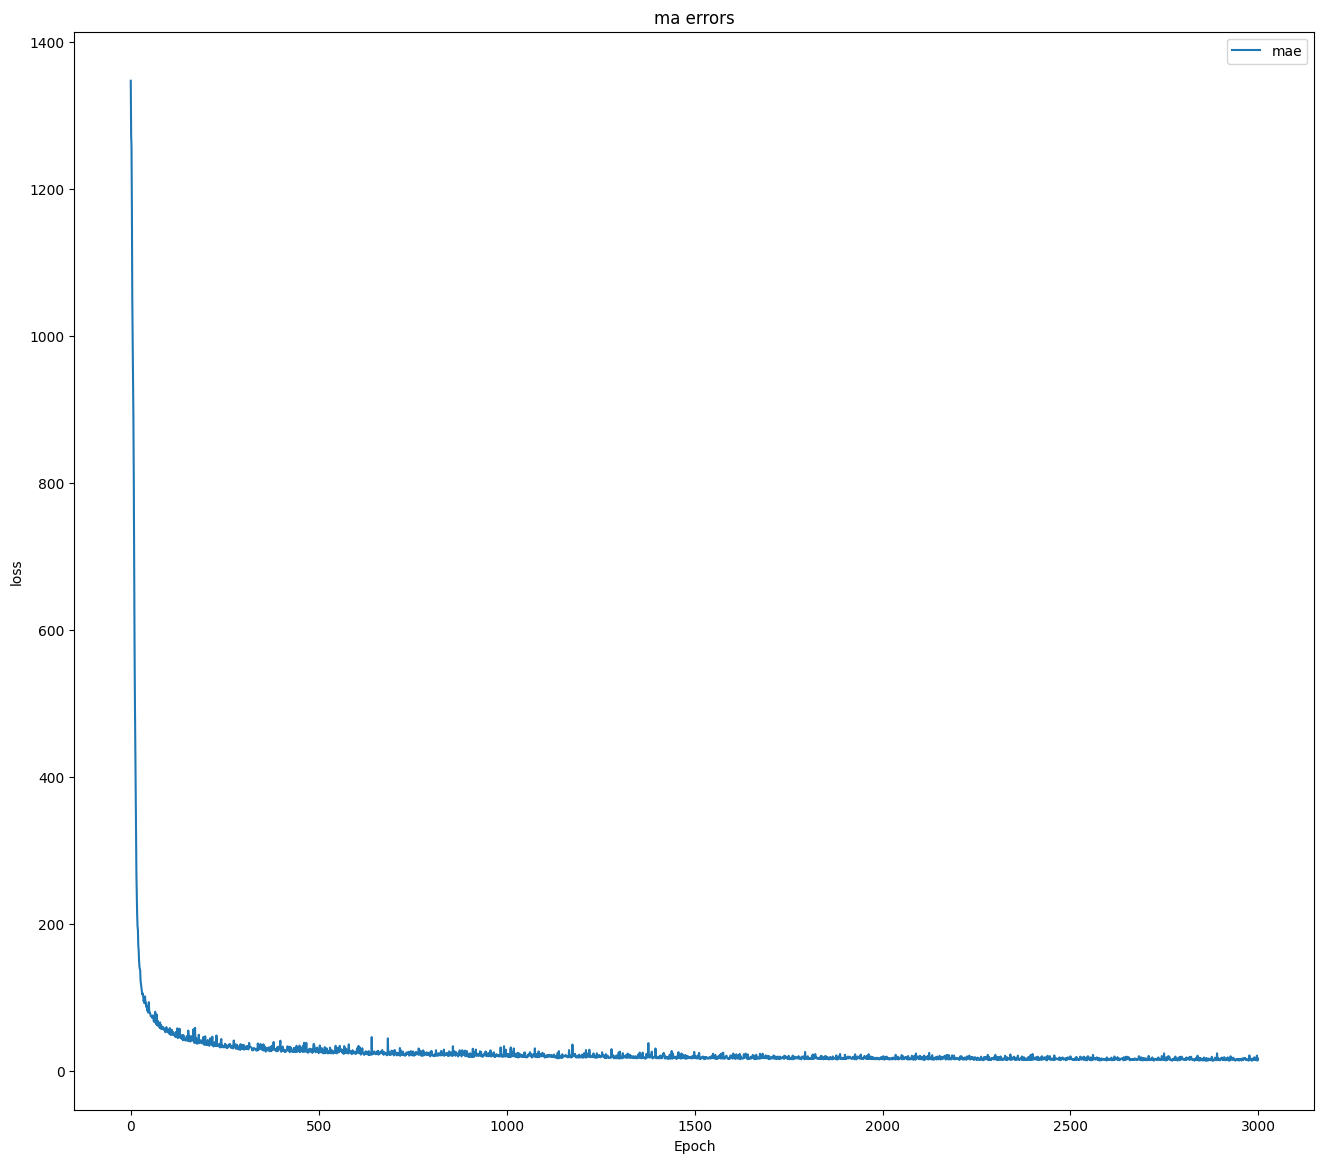

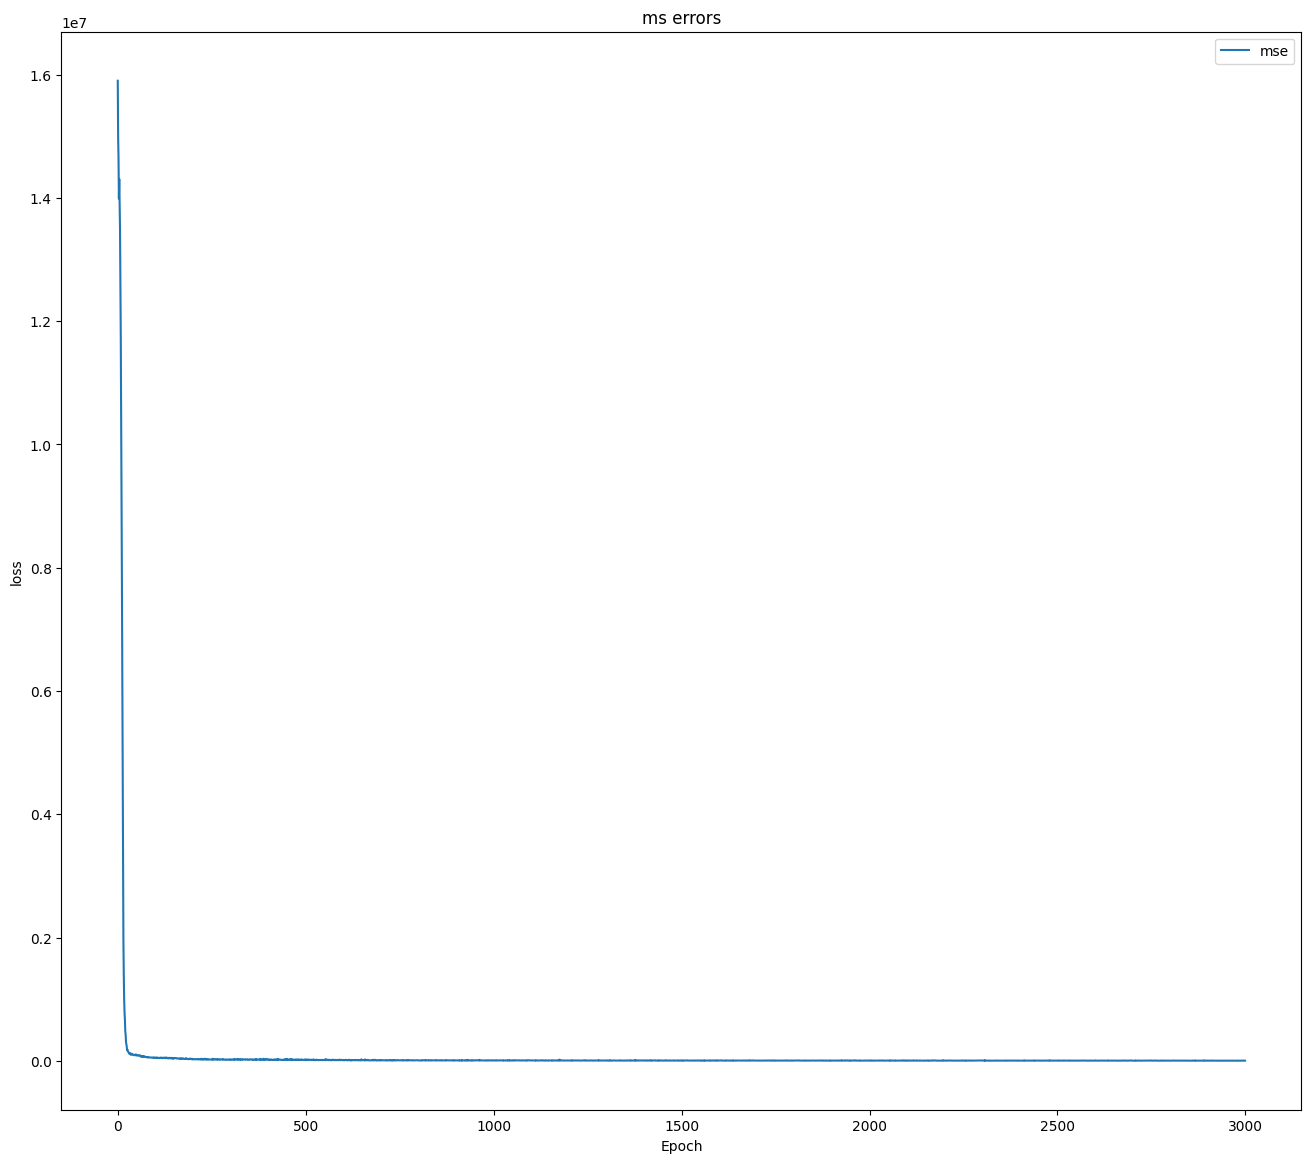

In [26]:
# Afficher les graphes d'accuracy et loss selon l'epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['loss'], label='Mean absolute percentege error')
plt.plot(history_mean_state.history['val_loss'], label='val Mean absolute percentege error')
plt.title('Mean absolute percentege error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['mae'], label='Mean absolute error')
plt.plot(history_mean_state.history['val_mae'], label='val Mean absolute error')
plt.title('Mean absolute error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['mse'], label='Mean squared error')
plt.plot(history_mean_state.history['val_mse'], label='val Mean squared error')
plt.title('Mean squared error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['val_loss'], label='mape')
plt.title('map errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['val_loss'], label='mape')
plt.title('map errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['val_mae'], label='mae')
plt.title('ma errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()

fig, ax = plt.subplots(figsize=(14, 12))
plt.plot(history_mean_state.history['val_mse'], label='mse')
plt.title('ms errors')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
# agrandir la taille de la figure
fig.set_size_inches(16, 14)
plt.show()
